In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Importing Dataset using pandas.

In [212]:
df = pd.read_csv('eda project.csv')

In [213]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### dropping unwanted column using drop method

In [214]:
df.drop(['ID'],axis = 1,inplace = True)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [215]:
df.shape

(10999, 11)

INFORMATION OF DATASET

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [217]:
df.rename(columns={'Warehouse_block': 'block',
                   'Mode_of_Shipment': 'ship_method',
                   'Customer_care_calls': 'number of calls',
                   'Customer_rating': 'rating',
                   'Cost_of_the_Product': 'cost',
                   'Prior_purchases': 'previousorders',
                   'Product_importance': 'priority',
                   'Gender': 'gender',
                   'Discount_offered': 'discount',
                   'Weight_in_gms': 'weight',
                   'Reached.on.Time_Y.N': 'on time'},
          inplace=True)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   block            10999 non-null  object
 1   ship_method      10999 non-null  object
 2   number of calls  10999 non-null  int64 
 3   rating           10999 non-null  int64 
 4   cost             10999 non-null  int64 
 5   previousorders   10999 non-null  int64 
 6   priority         10999 non-null  object
 7   gender           10999 non-null  object
 8   discount         10999 non-null  int64 
 9   weight           10999 non-null  int64 
 10  on time          10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [219]:
df['priority'].value_counts()

low       5297
medium    4754
high       948
Name: priority, dtype: int64

In [220]:
print(f'Number of Unique Values in Each Column:\n{df.nunique()}')

Number of Unique Values in Each Column:
block                 5
ship_method           3
number of calls       6
rating                5
cost                215
previousorders        8
priority              3
gender                2
discount             65
weight             4034
on time               2
dtype: int64


# FINDING THE NULL VALUES OF THE DATASET THEN WE MODIFY OR REMOVE ALL THE NULL VALUES IN THE DATASET
                    

# DATA CLEANING

In [221]:
df.isnull().sum()

block              0
ship_method        0
number of calls    0
rating             0
cost               0
previousorders     0
priority           0
gender             0
discount           0
weight             0
on time            0
dtype: int64

# CALCULATING THE PERCENTAGE OF NULL VALUES IN EACH COLUMN

In [222]:
df.isnull().sum()/df.shape[0]*100

block              0.0
ship_method        0.0
number of calls    0.0
rating             0.0
cost               0.0
previousorders     0.0
priority           0.0
gender             0.0
discount           0.0
weight             0.0
on time            0.0
dtype: float64

In [223]:
df1 = df.dropna()

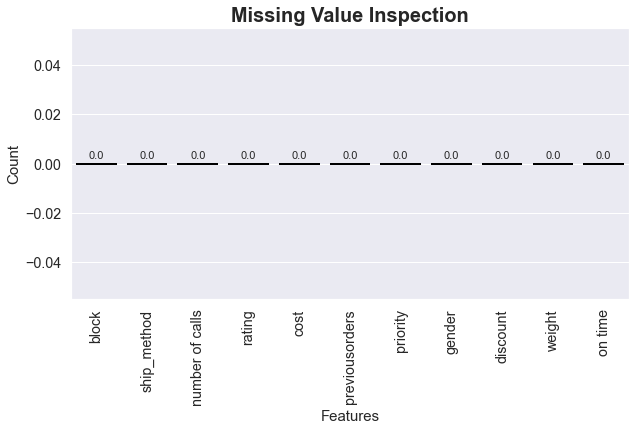

In [224]:
Value_Missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (10, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
cplot.set_title('Missing Value Inspection', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

AS WE CAN SEE THAT THERE ARE NO NULL VALUES IN THE DATASET SO THAT WE CAN PROCEED FURTHER

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   block            10999 non-null  object
 1   ship_method      10999 non-null  object
 2   number of calls  10999 non-null  int64 
 3   rating           10999 non-null  int64 
 4   cost             10999 non-null  int64 
 5   previousorders   10999 non-null  int64 
 6   priority         10999 non-null  object
 7   gender           10999 non-null  object
 8   discount         10999 non-null  int64 
 9   weight           10999 non-null  int64 
 10  on time          10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


### handling outliers

In [226]:
df.cost.describe()

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: cost, dtype: float64

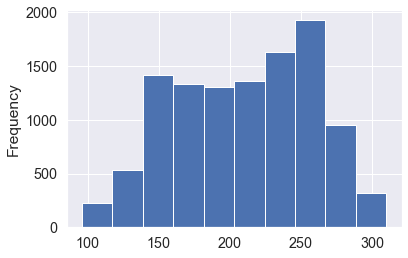

In [227]:
#histogram of cost variable
df.cost.plot.hist()
plt.show()

C:\Users\naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


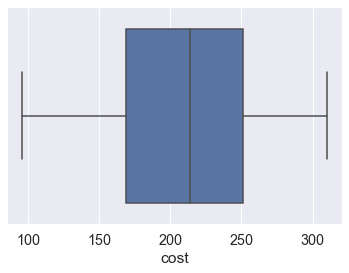

In [228]:
#plot the boxplot of number of cost variable.
sns.boxplot(df.cost)
plt.show()

In [229]:
df.weight.describe()

count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%       5050.000000
max       7846.000000
Name: weight, dtype: float64

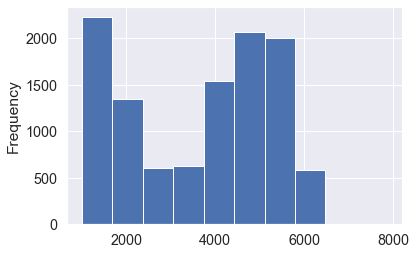

In [230]:
df.weight.plot.hist()
plt.show()

C:\Users\naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


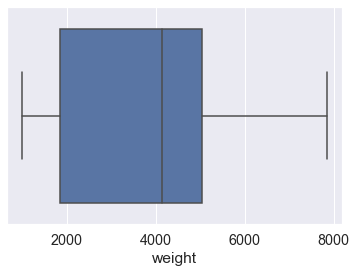

In [231]:
sns.boxplot(df.weight)
plt.show()

In [233]:
df.previousorders.describe()

count    10999.000000
mean         3.567597
std          1.522860
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: previousorders, dtype: float64

C:\Users\naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


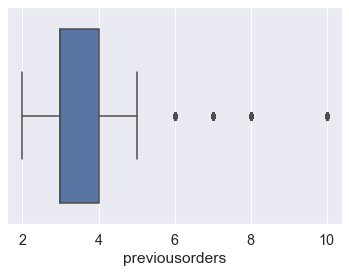

In [234]:
sns.boxplot(df.previousorders)
plt.show()


C:\Users\naveen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


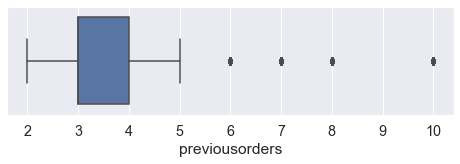

In [235]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=[8,2])
sns.boxplot(df.previousorders)
plt.show()

## 2.Univariate Analysis 

## Categorical unordered univariate analysis

In [237]:
#calculate the percentage of each marital status category. 
df.ship_method.value_counts(normalize=True)

Ship      0.678425
Flight    0.161560
Road      0.160015
Name: ship_method, dtype: float64

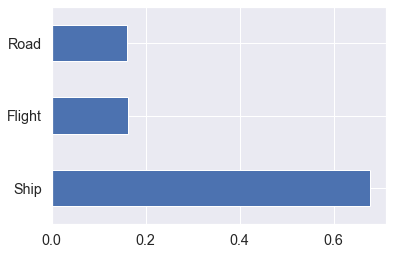

In [238]:
#plot the bar graph of percentage marital status categories
df.ship_method.value_counts(normalize=True).plot.barh()
plt.show()

In [240]:
#calculate the percentage of rating
df.rating.value_counts(normalize=True)

3    0.203564
1    0.203200
4    0.199018
5    0.197382
2    0.196836
Name: rating, dtype: float64

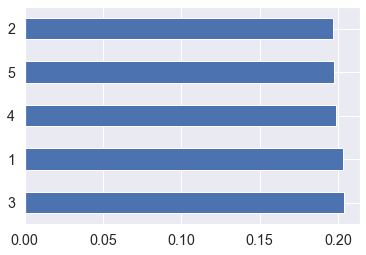

In [241]:
#plot the bar graph of percentage rating categories
df.rating.value_counts(normalize=True).plot.barh()
plt.show()

## Categorical ordered univariate analysis¶

## block

In [242]:
#calculate the percentage of each education category.
df.block.value_counts(normalize=True)

F    0.333303
D    0.166742
A    0.166652
B    0.166652
C    0.166652
Name: block, dtype: float64

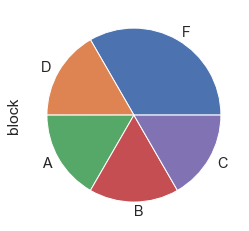

In [243]:
#plot the pie chart of block| categories
df.block.value_counts(normalize=True).plot.pie()
plt.show()

## 3.Bivariate and Multivariate Analysis

## Numeric- numeric analysis
There are three ways to analyse the numeric- numeric data types simultaneously.

Scatter plot: describes the pattern that how one variable is varying with other variable.
Correlation matrix: to describe the linearity of two numeric variables.
Pair plot: group of scatter plots of all numeric variables in the data frame.

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   block            10999 non-null  object
 1   ship_method      10999 non-null  object
 2   number of calls  10999 non-null  int64 
 3   rating           10999 non-null  int64 
 4   cost             10999 non-null  int64 
 5   previousorders   10999 non-null  int64 
 6   priority         10999 non-null  object
 7   gender           10999 non-null  object
 8   discount         10999 non-null  int64 
 9   weight           10999 non-null  int64 
 10  on time          10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


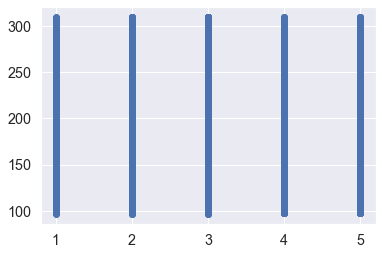

In [251]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(df.rating, df.cost)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


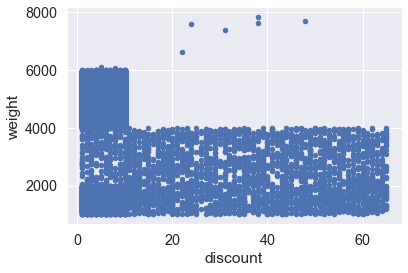

In [252]:
#plot the scatter plot of balance and age variable in inp1
df.plot.scatter(x="discount", y="weight")
plt.show()

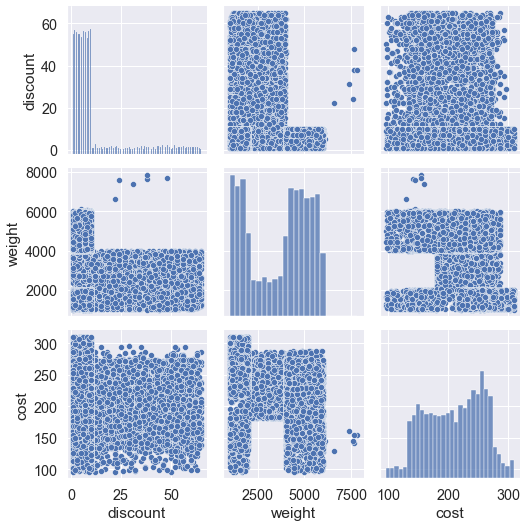

In [253]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=df,vars=["discount","weight","cost"])
plt.show()

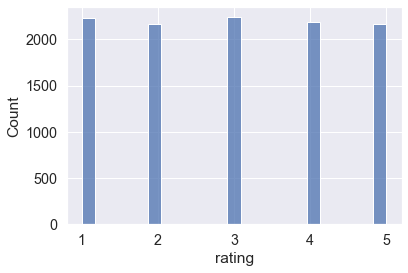

In [144]:
sns.histplot(x='rating', data=df );

## Correlation heat map

In [256]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
df[["discount","cost","rating"]].corr()

,discount,cost,rating
discount,1.000000,-0.138312,-0.003124
cost,-0.138312,1.000000,0.009270
rating,-0.003124,0.009270,1.000000


<AxesSubplot:>

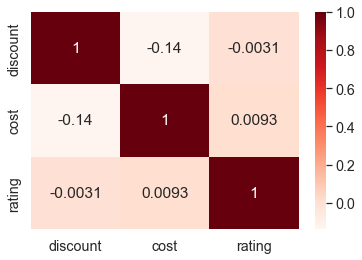

In [258]:
sns.heatmap(df[["discount","cost","rating"]].corr(),annot=True,cmap="Reds")

## Numerical categorical variable

## on time vs rating

In [260]:
#groupby the on time to find the mean of the rating with response no & yes seperatly.
df.groupby("on time")["rating"].mean()

on time
0    2.967989
1    3.005790
Name: rating, dtype: float64

In [261]:
#groupby the response to find the median of the salary with response no & yes seperatly.
df.groupby("on time")["rating"].median()

on time
0    3.0
1    3.0
Name: rating, dtype: float64

<AxesSubplot:xlabel='on time', ylabel='rating'>

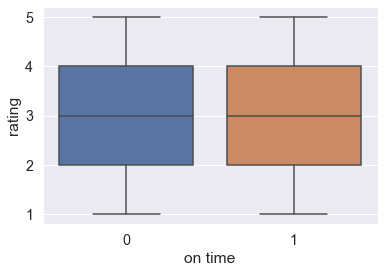

In [262]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=df,x="on time",y="rating")

<AxesSubplot:xlabel='cost', ylabel='gender'>

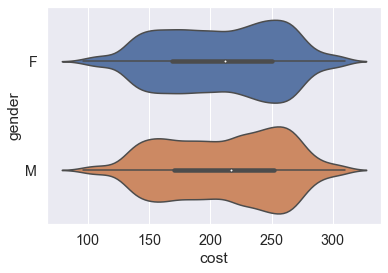

In [269]:
# Violin Plot
sns.violinplot(x=df["cost"], y=df["gender"])

<AxesSubplot:xlabel='block', ylabel='rating'>

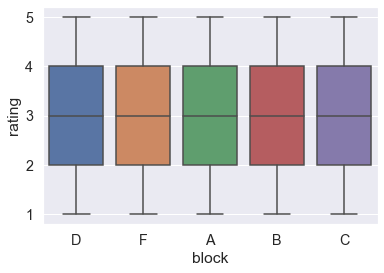

In [270]:
sns.boxplot(data=df,x="block",y="rating")

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   block            10999 non-null  object
 1   ship_method      10999 non-null  object
 2   number of calls  10999 non-null  int64 
 3   rating           10999 non-null  int64 
 4   cost             10999 non-null  int64 
 5   previousorders   10999 non-null  int64 
 6   priority         10999 non-null  object
 7   gender           10999 non-null  object
 8   discount         10999 non-null  int64 
 9   weight           10999 non-null  int64 
 10  on time          10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


<AxesSubplot:xlabel='on time', ylabel='ship_method'>

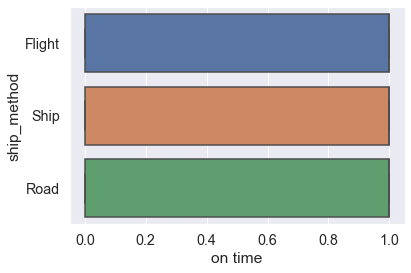

In [273]:
## plot the boxplot betweek reached on time and ship method
sns.boxplot(data=df,x="on time",y="ship_method")

In [283]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
df.groupby("gender")["weight"].mean()

gender
F    3628.222362
M    3639.907774
Name: weight, dtype: float64

In [282]:
#groupby the response to find the median of the balance with response no & yes seperatly.
df.groupby("gender")["weight"].median()

gender
F    4151.0
M    4145.0
Name: weight, dtype: float64

In [280]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [281]:
#calculate the mean, median and 75th percentile of balance with response
df.groupby("gender")["rating"].aggregate(["mean","median",p75])

,mean,median,p75
gender,,,
F,2.986655,3.0,4.0
M,2.994499,3.0,4.0


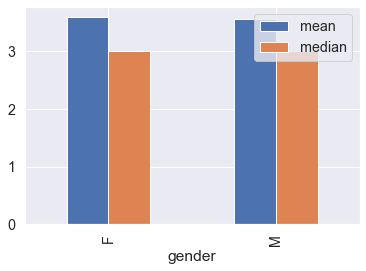

In [286]:
#plot the bar graph of balance's mean an median with response.
df.groupby("gender")["previousorders"].aggregate(["mean","median"]).plot.bar()
plt.show()

## Multivariate analysis
Education vs marital vs response

In [297]:
res=pd.pivot_table(data=df,index="block",columns="ship_method",values="rating")
res

ship_method,Flight,Road,Ship
block,,,
A,3.070707,2.812925,2.964573
B,2.996622,3.000000,2.971842
C,2.932203,3.068027,2.991158
D,2.818182,3.219178,3.018474
F,3.038851,2.936860,3.000804


<AxesSubplot:xlabel='ship_method', ylabel='block'>

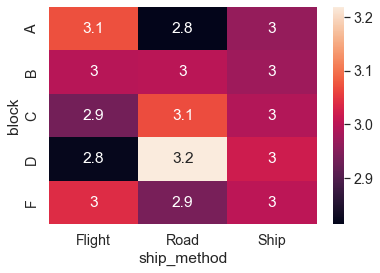

In [298]:
sns.heatmap(res,annot=True)

In [302]:
res=pd.pivot_table(data=df,index="block",columns="rating",values="on time")
res

rating,1,2,3,4,5
block,,,,,
A,0.550761,0.595745,0.602899,0.625714,0.562500
B,0.598383,0.611702,0.592992,0.609195,0.599455
C,0.593407,0.571823,0.610966,0.579946,0.628169
D,0.596154,0.591176,0.623077,0.598945,0.576177
F,0.594340,0.578059,0.602667,0.580081,0.637500


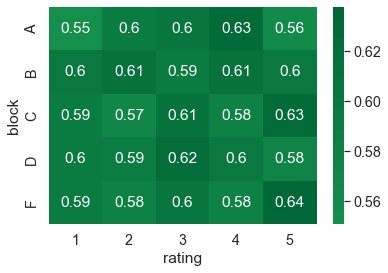

In [303]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

In [308]:
df[df.rating>0].cost.mean()

210.19683607600692

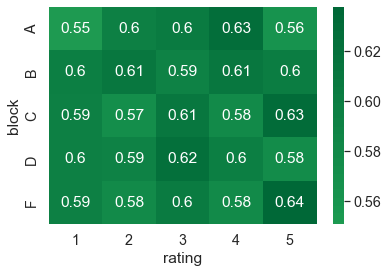

In [309]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.2308)
plt.show()

In [311]:
df.corr()

,number of calls,rating,cost,previousorders,gender,discount,weight,on time
number of calls,1.000000,0.012209,0.323182,0.180771,NaN,-0.130750,-0.276615,-0.067126
rating,0.012209,1.000000,0.009270,0.013179,NaN,-0.003124,-0.001897,0.013119
cost,0.323182,0.009270,1.000000,0.123676,NaN,-0.138312,-0.132604,-0.073587
previousorders,0.180771,0.013179,0.123676,1.000000,NaN,-0.082769,-0.168213,-0.055515
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount,-0.130750,-0.003124,-0.138312,-0.082769,NaN,1.000000,-0.376067,0.397108
weight,-0.276615,-0.001897,-0.132604,-0.168213,NaN,-0.376067,1.000000,-0.268793
on time,-0.067126,0.013119,-0.073587,-0.055515,NaN,0.397108,-0.268793,1.000000


In [314]:
df.drop(['gender'],axis = 1,inplace = True)
df

,block,ship_method,number of calls,rating,cost,previousorders,priority,discount,weight,on time
0,D,Flight,4,2,177,3,low,44,1233,1
1,F,Flight,4,5,216,2,low,59,3088,1
2,A,Flight,2,2,183,4,low,48,3374,1
3,B,Flight,3,3,176,4,medium,10,1177,1
4,C,Flight,2,2,184,3,medium,46,2484,1
...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,1,1538,1
10995,B,Ship,4,1,232,5,medium,6,1247,0
10996,C,Ship,5,4,242,5,low,4,1155,0
10997,F,Ship,5,2,223,6,medium,2,1210,0


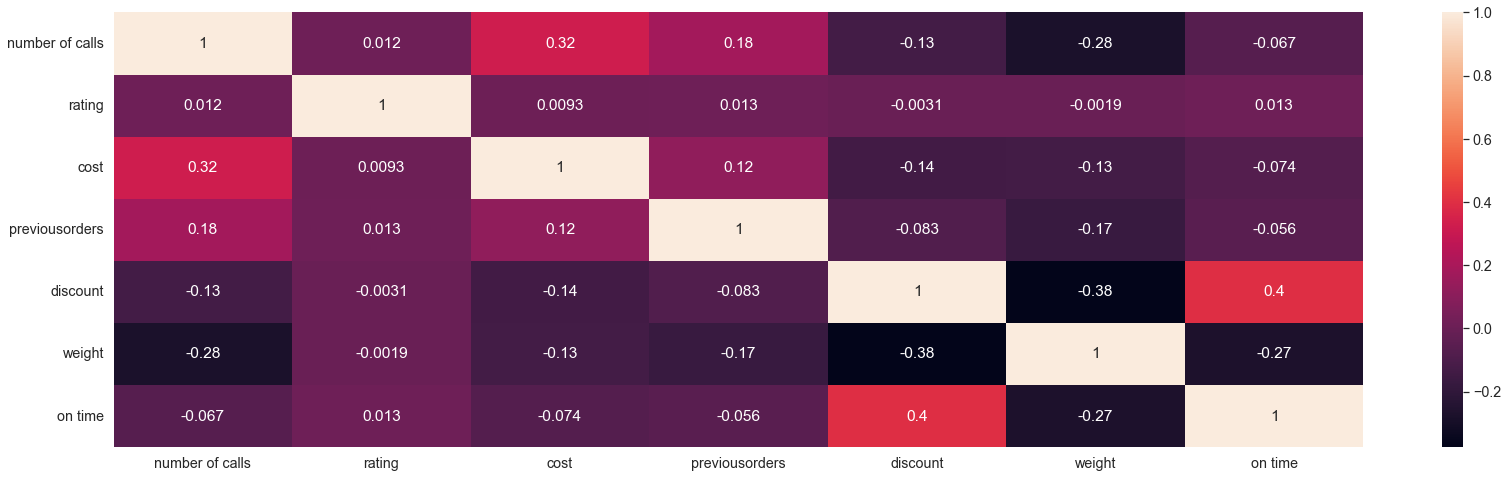

In [315]:
plt.subplots(figsize=(28,8))
corr = df.corr()
sns.heatmap(corr,annot=True,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values);
plt.show()

C:\Users\naveen\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


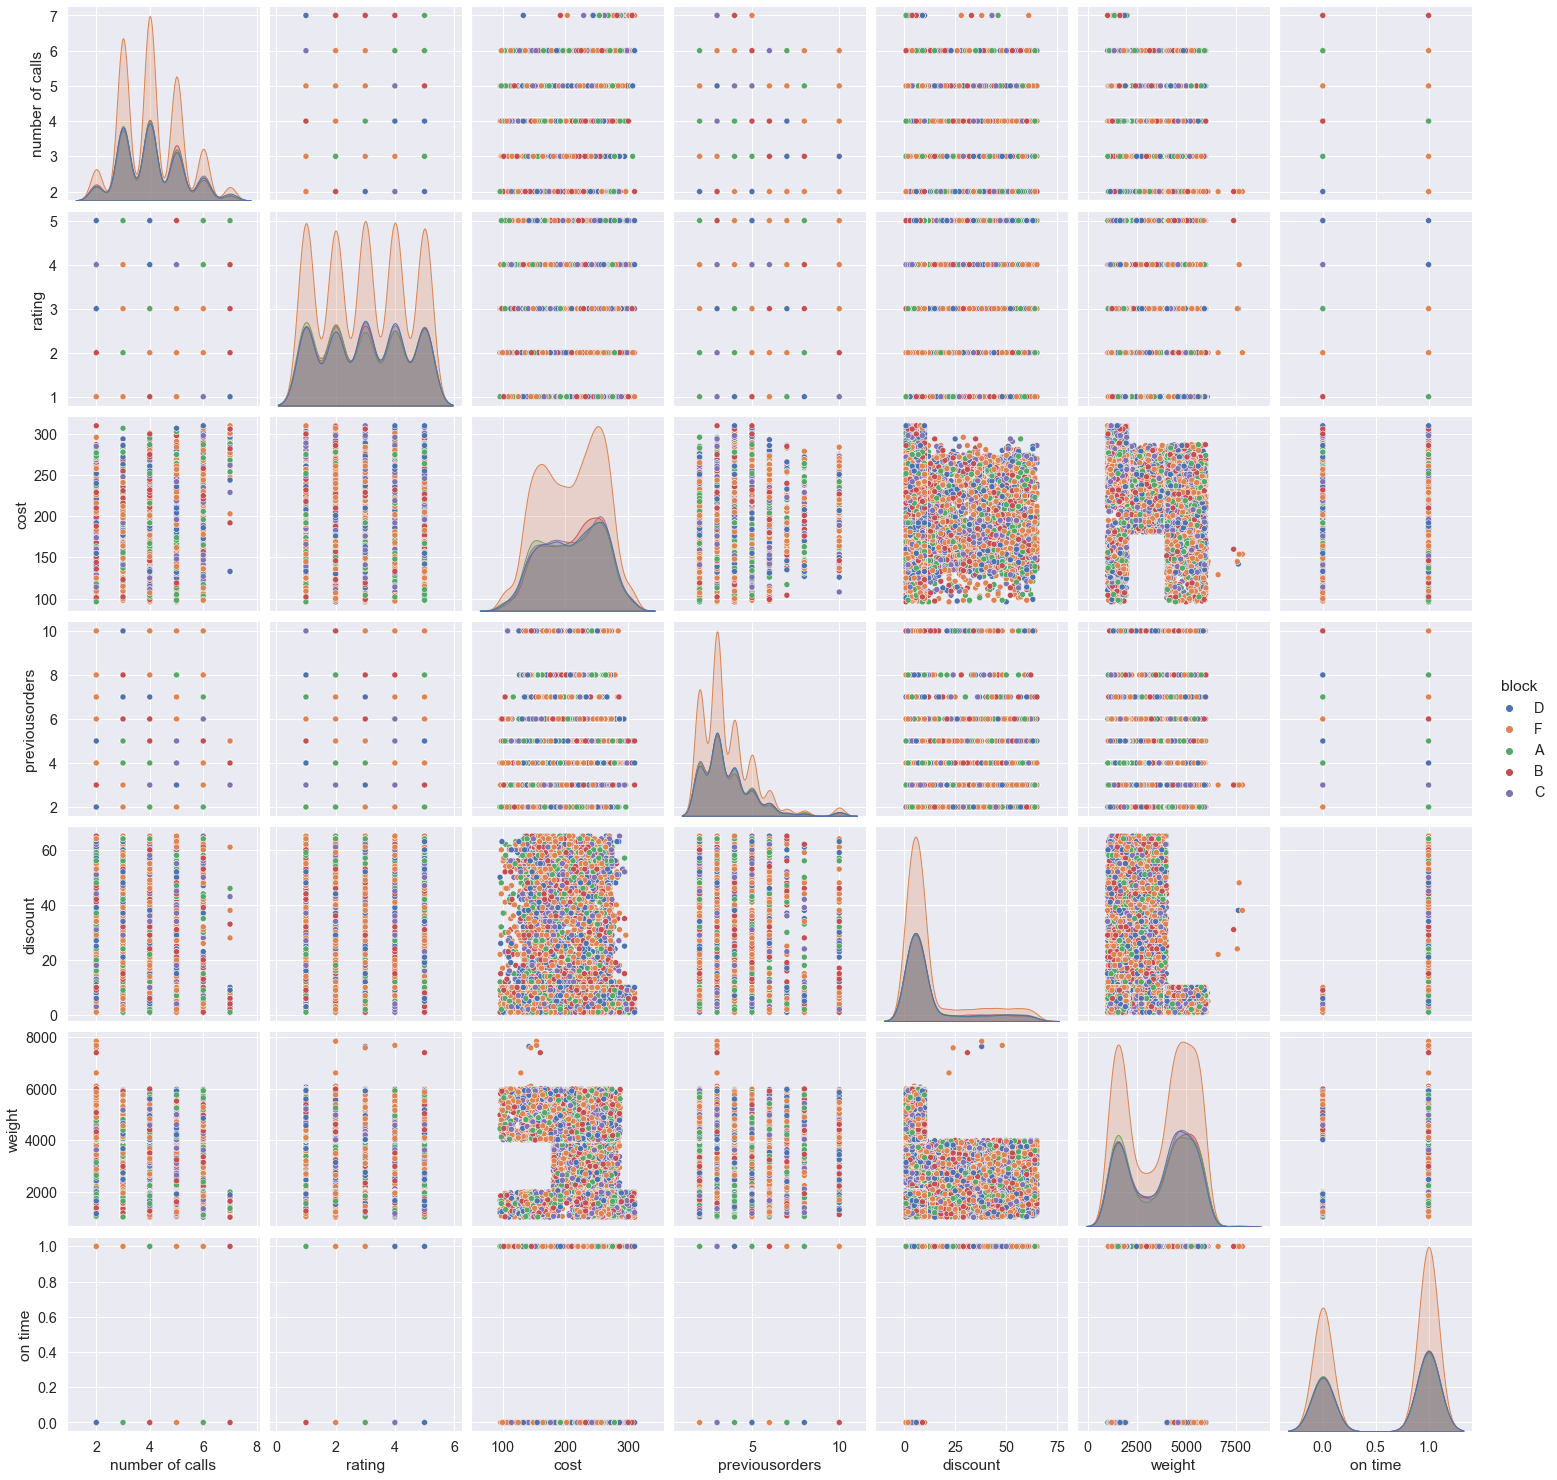

In [318]:
# Pair Plot
sns.pairplot(df,hue="block",size=3)

In [156]:
df1.mean()

C:\Users\naveen\AppData\Local\Temp/ipykernel_15700/2053335143.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean()


number of calls          4.054459
rating                   2.990545
cost                   210.196836
num of prev orders       3.567597
discount                13.373216
weight                3634.016729
on time                  0.596691
dtype: float64

### Most customers call about the status of their order 3-4 times, but 5 calls is not far behind
As stated before, the average rating is just under 3 on a 1-5 scale.
This is because the distribution of ratings is extremely equal
Most customers have 3 previous orders, but it is not uncommon for a customer to have between 2-5 prior purchases
About 48% of the orders are of low priority and the rest is made up of 43% medium priorty and the other ~9% is high priority

In [157]:
df1.mode()

,block,ship_method,number of calls,rating,cost,num of prev orders,priority,gender,discount,weight,on time
0,F,Ship,4,3,245,3,low,F,10,4883,1


In [158]:
df.median()

C:\Users\naveen\AppData\Local\Temp/ipykernel_15700/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


number of calls          4.0
rating                   3.0
cost                   214.0
num of prev orders       3.0
discount                 7.0
weight                4149.0
on time                  1.0
dtype: float64

In [159]:
df1.std()

C:\Users\naveen\AppData\Local\Temp/ipykernel_15700/3039516898.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.std()


number of calls          1.141490
rating                   1.413603
cost                    48.063272
num of prev orders       1.522860
discount                16.205527
weight                1635.377251
on time                  0.490584
dtype: float64